In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from os import listdir
root="./dataset";


# It is going to take a while to read all the data
#linecounter= 0
#filecounter=0
df = pd.DataFrame(columns=['user_id', 'alcoholic', 'paradigm','replication','Channel','Min','Max','Sd','Mean',
                               'Median','IQR','0.025','0.25','0.5','0.75','0.975'])
cont=0;
for file in listdir("./dataset"):


        # Renaming the file
        
        #filecounter= filecounter + 1
        
        file_root = root + "/" + file
        print(file_root)
        if(file!=".DS_Store"):
            read_file = open(file_root, 'r')
            read_file.readline()
            counterinside=0
            user = []
            alcoholic=[]
            paradigm=[]
            replication=[]
            channel=[]
           
            # For each line we separate the values to add them in the created dataframe
            for line in read_file:
               # if(filecounter<=5):
                #    linecounter= linecounter + 1
                
                firstline = line.split("  ")
                lineeg=[]

                for i in range(len(firstline)-1):
                    

                    if i==0:
                        user.append(float(firstline[i]))
                    elif i==1:
                        alcoholic.append(firstline[i])

                    elif i==2:

                        paradigm.append(firstline[i])

                    if i==3:

                        replication.append(float(firstline[i]))
                    elif i>=4:
                        if i==4:
                            channelline=firstline[i].split(" ")
                            channel.append(channelline[0])
                            if channelline[1][0]=='c':
                                canal=channelline[1][1:]
                                lineeg.append(float(canal))

                            else:
                                lineeg.append(float(channelline[1]))

                        else:
                            lineeg.append(float(firstline[i]))

              
                datachannel = pd.DataFrame(lineeg)
                min = datachannel.min()
                max = datachannel.max()
                sd = datachannel.std()
                mean = datachannel.mean()
                quantil0=datachannel.quantile(.025)
                quantil1=datachannel.quantile(.25)
                median=datachannel.quantile(.5)
                quantil3=datachannel.quantile(.75)
                quantil4=datachannel.quantile(.975)
                iqr=quantil3[0]-quantil1[0]
                # counterinside is the one which goes through the lines of the current file
                # cont is the counter which goes through all the files
                df.loc[cont]=[user[counterinside],alcoholic[counterinside],paradigm[counterinside],replication[counterinside],channel[counterinside],min[0],max[0],
                              sd[0],mean[0],median[0],iqr,quantil0[0],quantil1[0],median[0],quantil3[0],quantil4[0]]
               
                cont= cont +1
                counterinside= counterinside + 1

./dataset/.DS_Store
./dataset/co2a0000364.txt
./dataset/co2c0000337.txt


## Separar columnes


In [3]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler

features =['Min','Max','Sd','Mean',
                           'Median','IQR','0.025','0.25','0.5','0.75','0.975']
# Separating explicatives variables off the target
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['alcoholic']].values
print(x)


# Standardizing the features
x = StandardScaler().fit_transform(x)

[[-13.316       19.887        6.70782517 ...   4.751        8.169
   16.958     ]
 [-14.303       24.76         7.97712967 ...   4.74         8.647
   20.854     ]
 [-30.589       31.423        9.71450203 ...   5.788       12.868
   22.939     ]
 ...
 [ -3.916        4.873        1.89071    ...   0.966        2.431
    4.384     ]
 [-26.632       31.474       11.50519574 ...  -6.124       -0.63075
   26.896     ]
 [-30.741       10.763        8.96676689 ...  -5.351        0.997
    6.856     ]]


## PCA

In [4]:

# Keeping 3 components
pca = PCA(n_components=3)
# Explicatives variables transformation
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['component 1', 'component 2','component 3'])
principalDf.head(10)

,component 1,component 2,component 3
0,-2.659505,0.480825,-0.801137
1,-2.441585,1.162928,-0.913382
2,-2.581679,2.479426,-2.059401
3,-1.031020,2.519266,-1.391064
4,-2.658800,-0.528089,-0.371875
5,-2.670919,-0.420832,-0.538557
6,-2.358862,-1.287922,0.000881
7,-2.147530,-0.684521,-0.063342
8,-3.332963,-0.345215,-0.422444
9,-1.868494,-0.424308,-0.135328


## Drawing

In [5]:

pca.explained_variance_ratio_

array([0.54600944, 0.35088427, 0.07390642])

In [6]:
df_1 = pd.DataFrame(x, columns=features)

# Normalized data
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(df_1),columns = df_1.columns) 

# PCA
pca = PCA(n_components=3)
pca.fit_transform(data_scaled)

# components related with explicative variables
pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2','PC-3'])
# The columns we are gonna keep are pc-1: 0.25, pc-2:Sd and pc

,Min,Max,Sd,Mean,Median,IQR,0.025,0.25,0.5,0.75,0.975
PC-1,-0.304597,-0.125343,0.032614,-0.395102,-0.394010,0.101304,-0.339017,-0.394059,-0.394010,-0.349311,-0.146141
PC-2,-0.242682,0.451082,0.498209,0.123483,0.015106,0.427209,-0.219649,-0.105882,0.015106,0.194875,0.440197
PC-3,0.413438,0.354237,0.171920,-0.015765,-0.260768,-0.400412,0.310027,-0.069309,-0.260768,-0.363339,0.380151


In [7]:
finalDf = pd.concat([principalDf, df[['alcoholic']]], axis = 1)

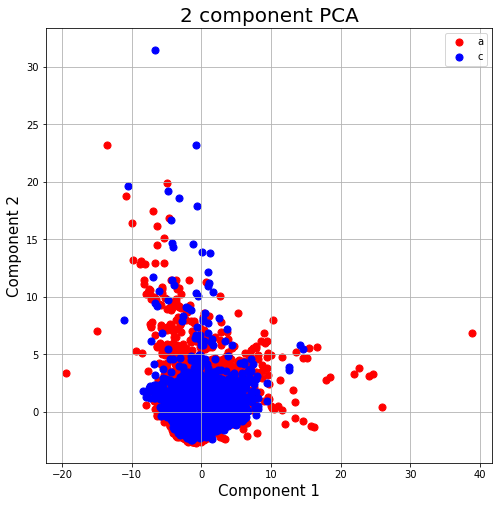

In [8]:

# Visualization of the alcoholic users
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['a', 'c']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['alcoholic'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'component 1']
                ,finalDf.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

In [66]:
# It only has to be used once because of the unnecessary columns have been removed and we only take the three explicative variables 
# which are more relevant
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model


resultDf = pd.concat([df, principalDf], axis=1)

# Split the targets into training/testing sets
 
finalDf.target=finalDf['alcoholic']
y=finalDf.target

#print(cont)
X_train, X_test, y_train, y_test= train_test_split(principalDf, y, test_size=0.5)

# Using linear regression
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

# Make predictions using the testing set   
predictions = model.predict(X_test)
print('Prediction: \n',  predictions )


Prediction: 
 ['a' 'c' 'a' ... 'a' 'a' 'a']


In [67]:
print('Accuracy got it from linear regression:',model.score(X_test, y_test))

Accuracy got it from linear regression: 0.5817018072289156


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          a       0.57      0.81      0.67      2777
          c       0.61      0.34      0.43      2535

avg / total       0.59      0.58      0.56      5312

